# **Loan eligibility process**
<p><img                                 src="https://img.iproperty.com.my/angel-legacy/1110x624-crop/static/2019/07/Property_Finance_Condo_Loan_sts_1372683893.jpg" alt="Google Play logo"></p>


* INTRO
    - Description
* Loading Data
* EDA
* Answer Question of Data Analsis:<br>
    1.What is the highest applicants of gender targeting loans in this data?<br>
    2.What is the highest category of Married targeting loans in this data?<br>
    3.What is the highest category of Education targeting loans in this data?<br>
    4.What is the highest category of Self_Employed targeting loans in this data?<br>
    5.What is the highest applicants of period(Loan_Amount_Term) targeting loans in this data?<br>
    6.How many loan approved in Property_Area (Rural) with Loan_Status=Yes?<br>
    7.what is the total money that each Category of Self_Employed spent?<br>
    8.What is the highest salary and a loan that has been accepted?<br>
    - Distribution of Numerical Data<br>
    - Correlation<br>
* Data Preprocessing
    1. Drop Unnecessary Columns
    2. Rename Columns in a suitable form
    3. Handle Duplicate Values
    4. Check Missing Values
    5. Data Cleaning
    6. Transform Data Type
    7. Detect and Handle outliers
    8. Handle Skewed Distribution
    9. Deal with Imbalanced Classes
    10. Data Normalization
    11. Splitting Data Set

* Modeling
    1. Logistic Regression
    2. K-Nearest Neighbour (KNN)
    3. Support Vector Machine (SVM)
    4. Decision Tree
    5. Random Forest
    
* Model Comparison
* Model Saving



# **Intro** 

**_Bank wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers._**


## **Description**



<b>Loan_ID</b> : 
Loan reference number  (unique ID)
LP001002; LP001003; ...

<b>Gender</b> : 
Applicant gender  (Male or Female)
Male; Female

<b>Married</b> : 
Applicant marital status  (Married or not married)
Married; Not Married	

<b>Dependents</b> : 
Number of family members
0; 1; 2; 3+

<b>Education</b> : 
Applicant education/qualification  (graduate or not graduate)
Graduate; Under Graduate


<b>Self_Employed</b> : 
Applicant employment status  (yes for self-employed, no for employed/others)
Yes; No

<b>ApplicantIncome</b> : 
Applicant's monthly salary/income
5849; 4583; ...

CoapplicantIncome</b> : 
Additional applicant's monthly salary/income
1508; 2358; ...

<b>LoanAmount</b> : 
Loan amount
128; 66; ...

<b>Loan_Amount_Term</b> : 
The loan's repayment period (in days)
360; 120; ...

<b>Credit_History</b> : 
Records of previous credit history  (0: bad credit history, 1: good credit history)
0; 1

<b>Property_Area</b> : 
The location of property  (Rural/Semiurban/Urban)

<b>Loan_Status</b> : 
Status of loan  (Y: accepted, N: not accepted)




# **Import Libararies**


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import scipy
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **Loading Data**


In [5]:
df_loan = pd.read_csv(r'D:\AI\Data science\8-Final Project\Final Project\Sources\Loan_data_train.csv')


In [6]:
df_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# **Exploration Data Analysis** EDA


## ***EDA***

In [7]:
df_loan.head(3)
# Read the first two rows in the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [8]:
df_loan.tail(3)
#Read the last three rows of the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
df_loan.shape
#Check the shape of the data

(614, 13)

In [10]:
df_loan.info()
# Check the information in the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# what is the unique values in each caregorical column?
categorical  = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'
       ]

for cat in categorical:
    print(f"{cat} : {df_loan[cat].unique()}")
    print('_'*70)

Gender : ['Male' 'Female' nan]
______________________________________________________________________
Married : ['No' 'Yes' nan]
______________________________________________________________________
Dependents : ['0' '1' '2' '3+' nan]
______________________________________________________________________
Education : ['Graduate' 'Not Graduate']
______________________________________________________________________
Self_Employed : ['No' 'Yes' nan]
______________________________________________________________________
Credit_History : [ 1.  0. nan]
______________________________________________________________________
Property_Area : ['Urban' 'Rural' 'Semiurban']
______________________________________________________________________
Loan_Status : ['Y' 'N']
______________________________________________________________________


In [13]:
# what is the unique values in each caregorical column?
categorical  = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'
       ]

for cat in categorical:
    print(f"{cat} : {df_loan[cat].nunique()}")
    print('_'*70)

Gender : 2
______________________________________________________________________
Married : 2
______________________________________________________________________
Dependents : 4
______________________________________________________________________
Education : 2
______________________________________________________________________
Self_Employed : 2
______________________________________________________________________
Credit_History : 2
______________________________________________________________________
Property_Area : 3
______________________________________________________________________
Loan_Status : 2
______________________________________________________________________


## ***Answer Question of Data Analsis :***

### 1.What is the highest applicants of gender targeting loans in this data?

In [14]:
df_loan.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [15]:
px.histogram(df_loan, x="Gender" )

In [16]:
# Content Type on Netflix
categ = df_loan['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender', 'Gender':'count'})
fig = go.Figure([go.Pie(labels=categ['Gender'], values=categ['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))])
fig = fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15, insidetextorientation='radial')
fig = fig.update_layout(title='Gender of Customers', title_x=0.5)
fig.show()

In [17]:
countMale = len(df_loan[df_loan.Gender == 'Male'])
countFemale = len(df_loan[df_loan.Gender == 'Female'])
countNull = len(df_loan[df_loan.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df_loan.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df_loan.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df_loan.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


>> From the results above, the number of male applicants is higher compared to female applicants :<br>
Percentage of Male applicant: 79.64%<br>
Percentage of Female applicant: 18.24%

### 2.What is the highest category of Married targeting loans in this data?

In [18]:
df_loan.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [19]:
px.histogram(df_loan, x="Married",color_discrete_sequence = ['green'] )

In [20]:
countMarried = len(df_loan[df_loan.Married == 'Yes'])
count_Not_Married = len(df_loan[df_loan.Married == 'No'])
countNull = len(df_loan[df_loan.Married.isnull()])

print("Percentage of Married applicant: {:.2f}%".format((countMarried / (len(df_loan.Married))*100)))
print("Percentage of Not Married applicant: {:.2f}%".format((count_Not_Married / (len(df_loan.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df_loan.Married))*100)))

Percentage of Married applicant: 64.82%
Percentage of Not Married applicant: 34.69%
Missing values percentage: 0.49%


>>The number of applicants that has been married is higher compared to applicants that hasn't married.<br>
Percentage of Married applicant: 64.82%<br>
Percentage of Not Married applicant: 34.69%<br>
Missing values percentage: 0.49%

### 3.What is the highest category of Education targeting loans in this data?

In [21]:
df_loan.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [22]:
px.histogram(df_loan, x="Education" , color_discrete_sequence = ['gray'] )

In [23]:
countGraduated = len(df_loan[df_loan.Education == 'Graduate'])
count_Not_Graduated = len(df_loan[df_loan.Education == 'Not Graduate'])
countNull = len(df_loan[df_loan.Education.isnull()])

print("Percentage of Graduated applicant: {:.2f}%".format((countGraduated / (len(df_loan.Education))*100)))
print("Percentage of Not Graduated applicant: {:.2f}%".format((count_Not_Graduated / (len(df_loan.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df_loan.Education))*100)))

Percentage of Graduated applicant: 78.18%
Percentage of Not Graduated applicant: 21.82%
Missing values percentage: 0.00%


>>The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.<br>
Percentage of Graduated applicant: 79.64%<br>
Percentage of Not Graduated applicant: 18.24%<br>
Missing values percentage: 0.00%


### 4.What is the highest category of Self_Employed targeting loans in this data?

In [24]:
df_loan.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [25]:
px.histogram(df_loan, x="Self_Employed" , color_discrete_sequence = ['teal'] )

In [26]:
count_Self_Employed = len(df_loan[df_loan.Self_Employed == 'Yes'])
count_Not_Self_Employed = len(df_loan[df_loan.Self_Employed == 'No'])
countNull = len(df_loan[df_loan.Self_Employed.isnull()])

print("Percentage of Self_Employed applicant: {:.2f}%".format((count_Self_Employed / (len(df_loan.Self_Employed))*100)))
print("Percentage of Not Self_Employed applicant: {:.2f}%".format((count_Not_Self_Employed / (len(df_loan.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df_loan.Self_Employed))*100)))

Percentage of Self_Employed applicant: 13.36%
Percentage of Not Self_Employed applicant: 81.43%
Missing values percentage: 5.21%


>>The number of applicants that are not self employed is higher compared to applicants that are self employed.<br>
Percentage of Self_Employed applicant: 13.36%<br>
Percentage of Not Self_Employed applicant: 81.43%<br>
Missing values percentage: 5.21%


### 5.What is the highest applicants of period(Loan_Amount_Term) targeting loans in this data?

In [27]:
df_loan.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
px.histogram(df_loan, x="Loan_Amount_Term" , color_discrete_sequence = ['purple'] )

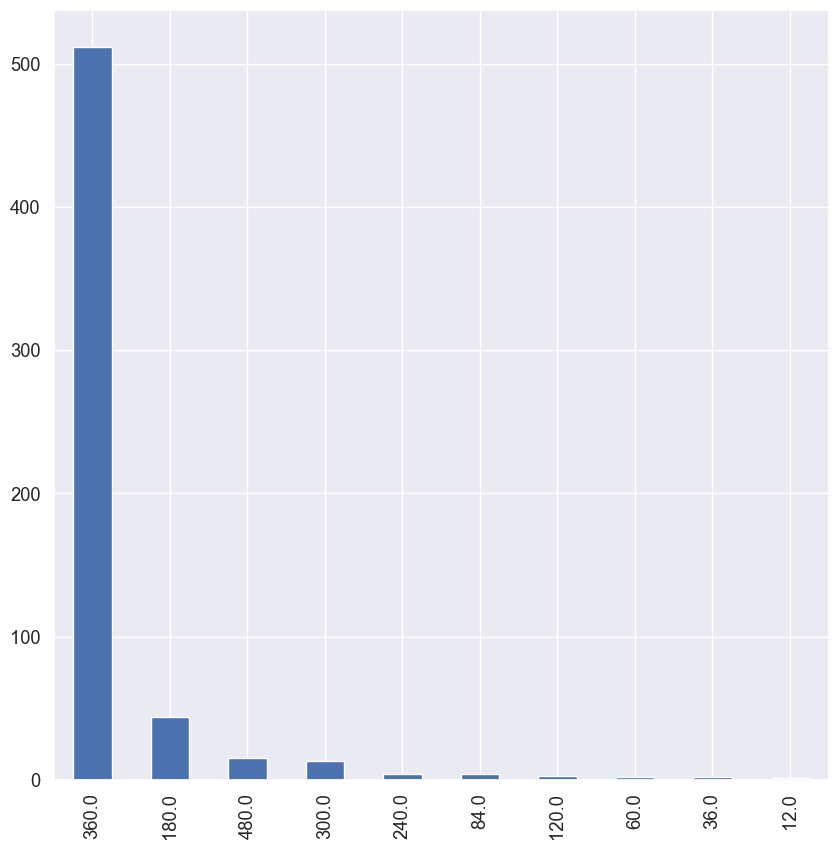

In [29]:
df_loan['Loan_Amount_Term'].value_counts().plot.bar();

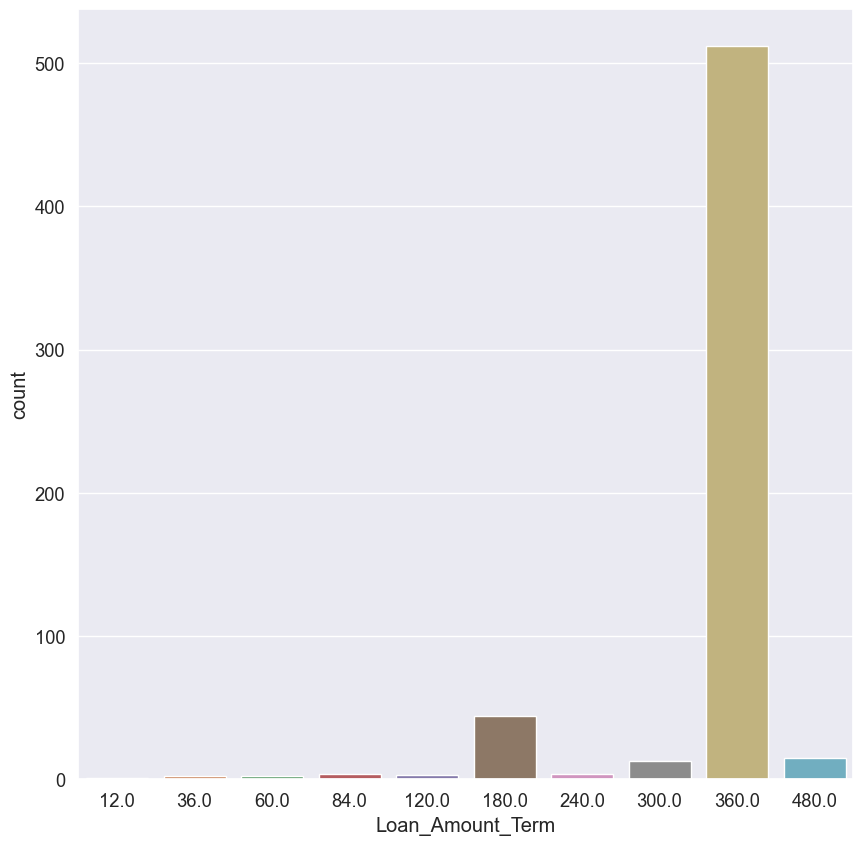

In [30]:
sns.countplot(x="Loan_Amount_Term", data=df_loan)
plt.show()

In [31]:
count360 = len(df_loan[df_loan.Loan_Amount_Term == 360.0])
print("Percentage of 360: {:.2f}%".format((count360 / (len(df_loan.Loan_Amount_Term))*100)))

Percentage of 360: 83.39%


>>As can be seen from the results the 360 days loan duration is the most popular period.<br>
Percentage of 360: 83.39%

---------------------------------------------------------------------------

In [32]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 6.How many loan approved in Property_Area (Rural) with Loan_Status=Yes?

In [33]:
df_loan['Property_Area'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object>

In [34]:
sum(df_loan[df_loan['Property_Area']=='Rural']['Loan_Status']=='Y')

110

In [35]:
fig3 = px.pie(df_loan, values='LoanAmount', names='Property_Area', hole=.5,color_discrete_sequence=px.colors.qualitative.Pastel1)
fig3.show()


In [36]:
px.histogram(df_loan, x="Loan_Amount_Term", color='LoanAmount', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel)

### 7.what is the total money that each Category of Self_Employed spent?

In [37]:

category_Self_Employed_fig = df_loan.groupby('Self_Employed')[['LoanAmount']].sum().sort_values(by='LoanAmount',ascending = False)
category_Self_Employed_fig

,LoanAmount
Self_Employed,
No,68323.0
Yes,13588.0


In [38]:
category_Self_Employed_fig = px.bar(df_loan.groupby('Self_Employed')[['LoanAmount']].sum().sort_values(by='LoanAmount',ascending = False),color_discrete_sequence=px.colors.qualitative.Alphabet_r)
category_Self_Employed_fig

In [39]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 8.What is the highest salary and a loan that has been accepted?

In [40]:
df_loan[df_loan['LoanAmount'] == df_loan['LoanAmount'].max()].ApplicantIncome.values[0]

51763

In [41]:
df_loan['LoanAmount'].max()

700.0

--------------------------------------------------------------------------------

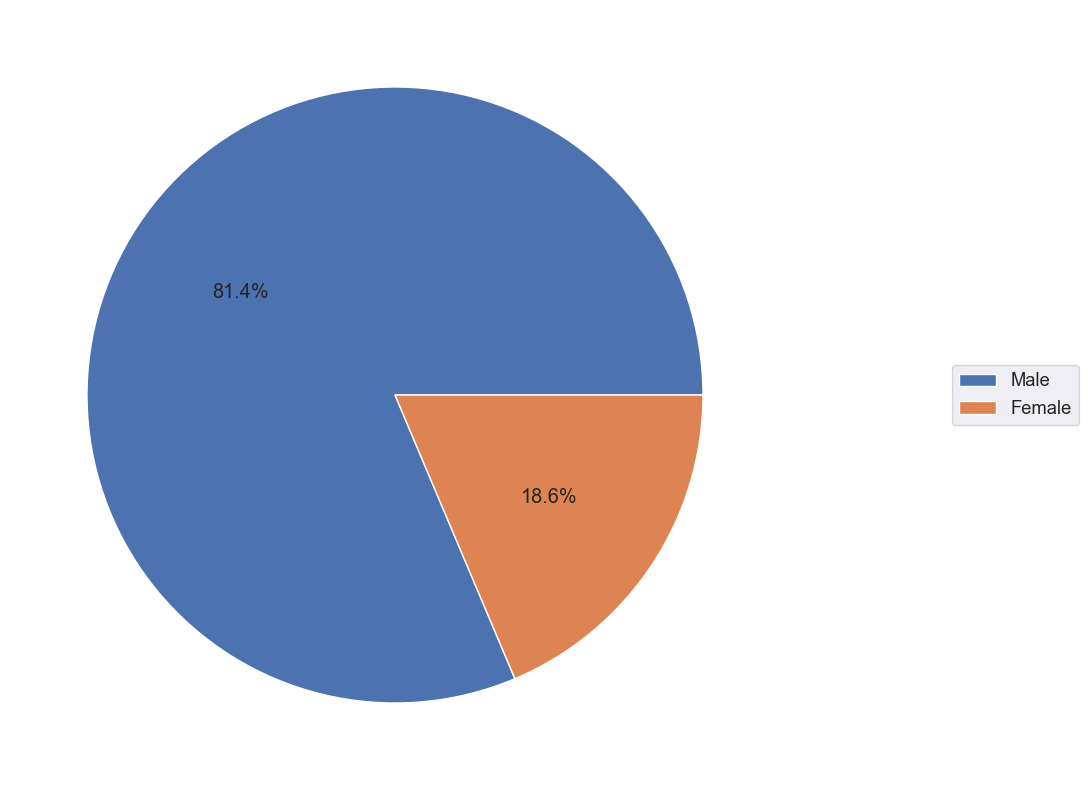

In [42]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
number_of_apps = df_loan["Gender"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

### Distribution of Numerical Data :

In [43]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
import plotly.figure_factory as ff

hist_data = df_loan.CoapplicantIncome
ff.create_distplot([hist_data], ['CoapplicantIncome'], bin_size=1000, show_rug=True)

In [45]:
ff.create_distplot([hist_data], ['ApplicantIncome'], bin_size=200, show_rug=True, show_curve=True,show_hist=True, colors=['green'])


In [46]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

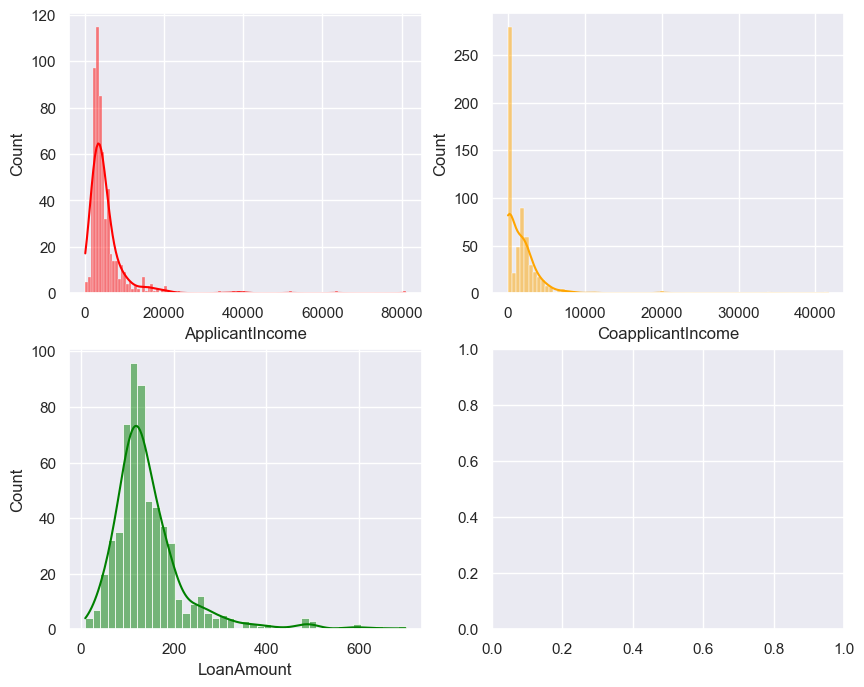

In [47]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_loan, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df_loan, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df_loan, x="LoanAmount", kde=True, ax=axs[1, 0], color='green');

>**we notice that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed**

### Correlation :

In [48]:
df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [49]:

fig = px.imshow(df_loan.corr(),text_auto=True)
fig.show()

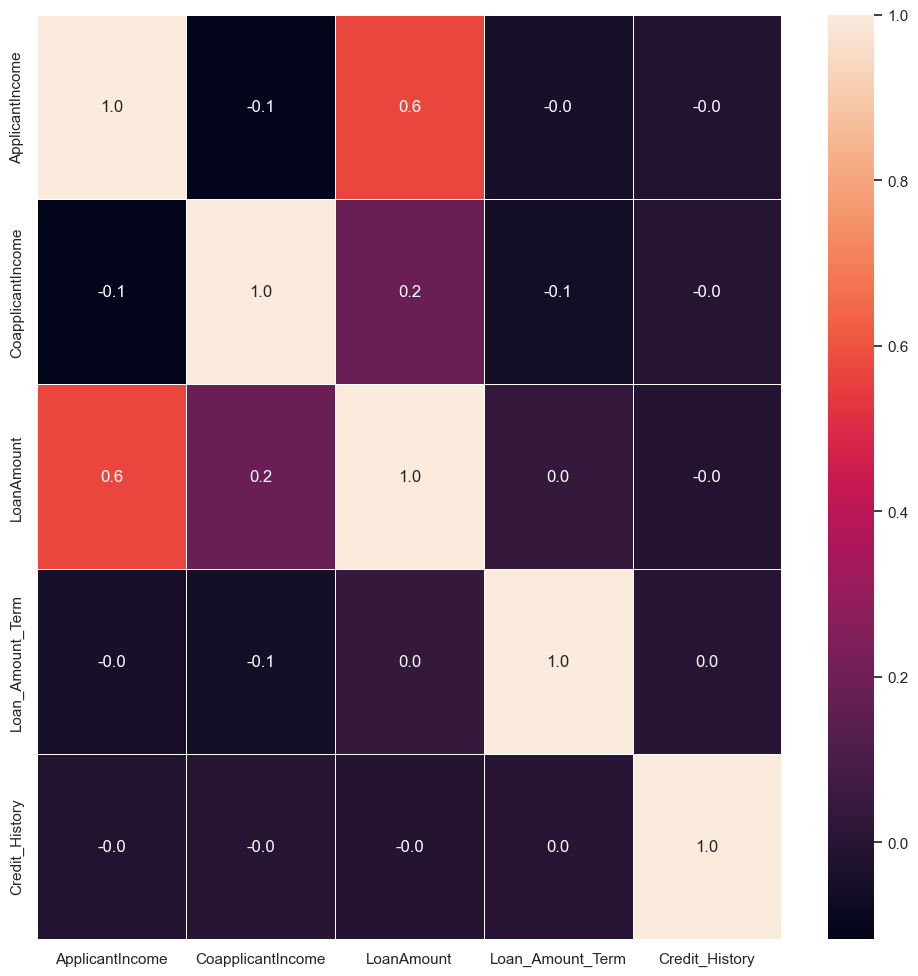

In [50]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_loan.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [51]:
df_loan[['CoapplicantIncome','LoanAmount']].corr() #there is corelation

,CoapplicantIncome,LoanAmount
CoapplicantIncome,1.000000,0.188619
LoanAmount,0.188619,1.000000


In [52]:

# fig1 = px.line(df_loan, x="LoanAmount", y=df_loan.columns[1:])
# fig1.show()


px.hea

In [53]:
# df_loan['dependents'].unique()

In [54]:
# df_loan['dependents'].nunique()

In [55]:
# df_loan['dependents'].value_counts()

In [56]:
# .describe()df_loan

### pandas_profiling

In [57]:
# import pandas_profiling

In [58]:
# import pandas_profiling as pp

In [59]:
# profile = pandas_profiling.ProfileReport(df_loan)
# profile

In [60]:
# import pandas_profiling as pp

#Usage
# profile = pp.ProfileReport(df_loan)

#Export
# profile.to_file("Report.html")

# **Data Preprocessing**

### **1. Drop Unnecessary Columns**


In [61]:
df = df_loan.drop(['Loan_ID'], axis = 1, inplace=True)

In [62]:
df_loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Rename Columns in a suitable form


In [64]:
df_loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
df_loan.columns = df_loan.columns.str.lower().str.strip()

In [66]:
df_loan.columns= df_loan.columns.str.replace(' ', '_')

In [67]:
df_loan.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

### 3. Handle Duplicate Values


In [68]:
df_loan.duplicated().sum()

0

In [69]:
# df_loan = df_loan.drop_duplicates()

In [70]:
# df_loan.duplicated().sum()

### 4. Check Missing Values



* Take a first look at the data
* See how many missing data points we have
* Figure out why the data is missing
* Drop missing values
* Filling in missing values
    - For Numerical Data
        * Mean
        * Median
        * Mode or Most frequent
    - For Categorical Data
        * Mode or Most frequent
* Fill Missing data with Sklearn Imputer
    - SimpleImputer
        * Mean
        * Median
        * Mode or Most frequent
    - KNNImputer        

In [71]:
df_loan.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
df_loan.isna().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

**See how many missing data points we have :**

Ok, now we know that we do have some missing values. Let's see how many we have in each column. 

In [73]:
# get the number of missing data points per column
missing_values_count = df_loan.isnull().sum()
# missing_values_count.sort_values(ascending=False)

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
dtype: int64

<AxesSubplot: >

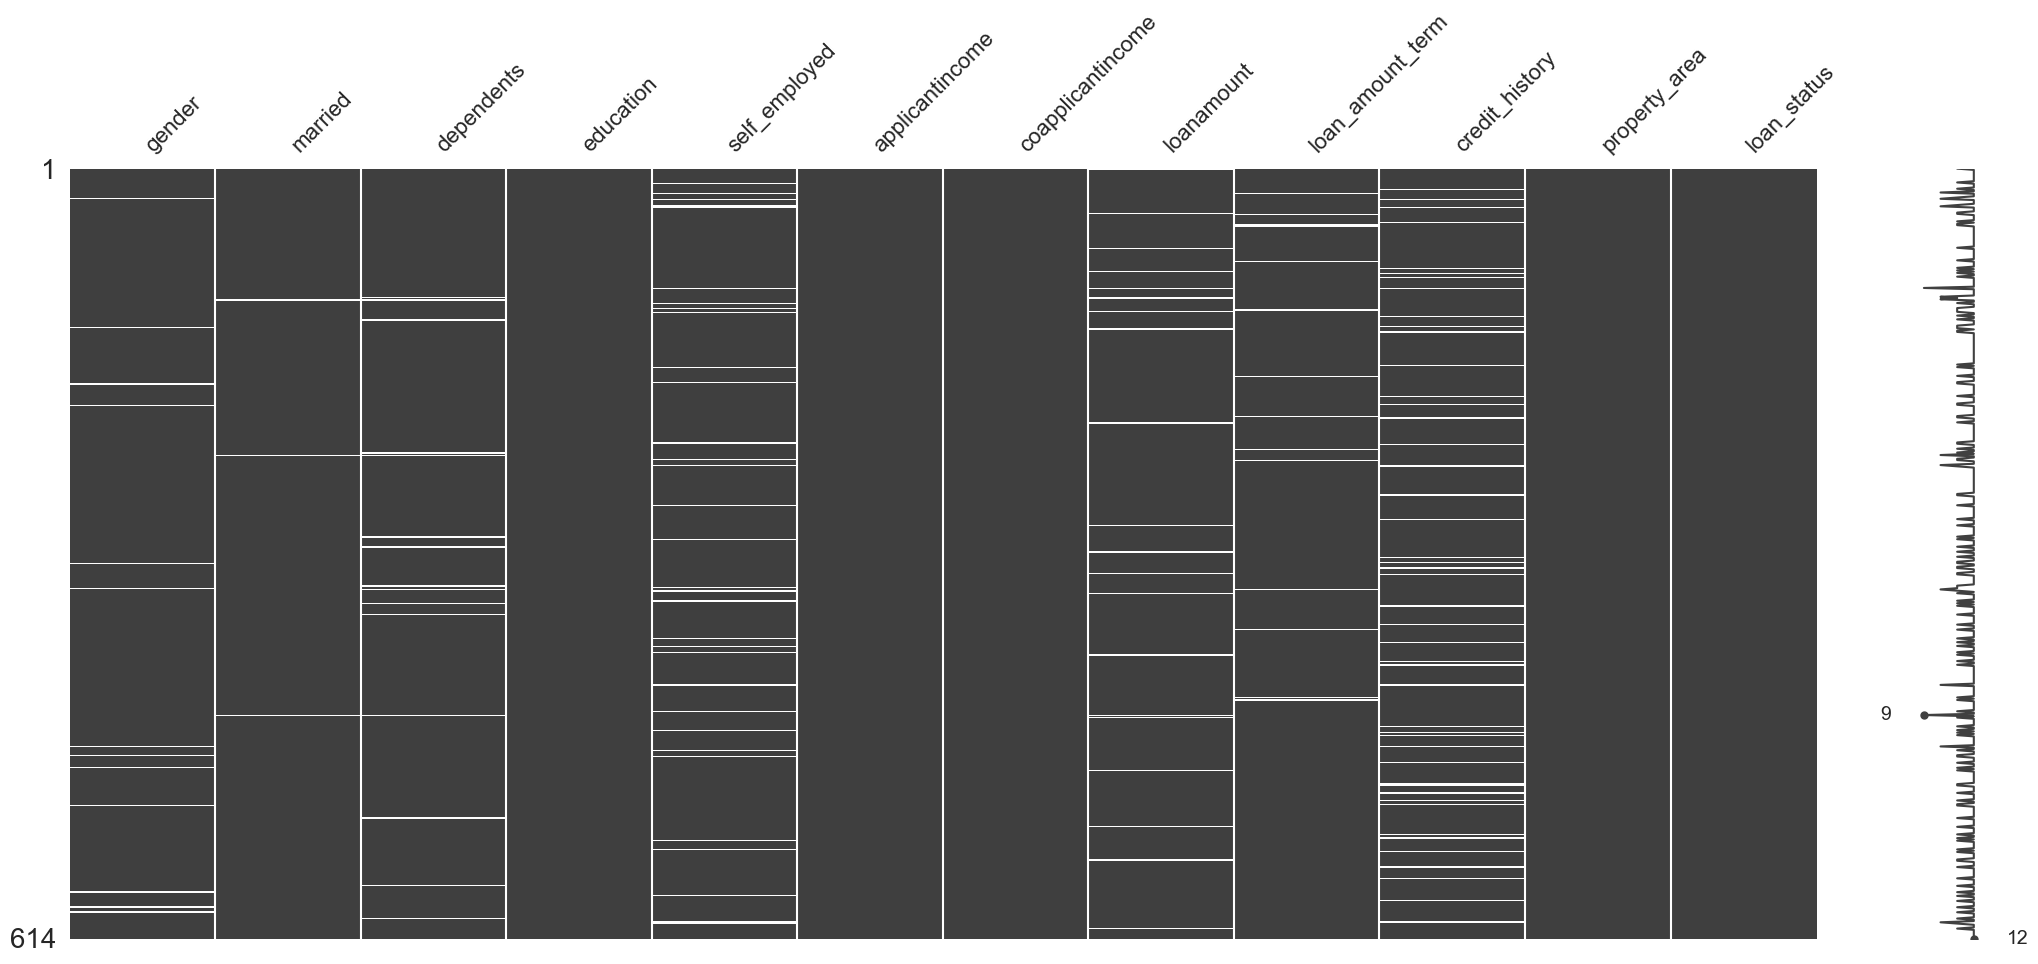

In [74]:
msno.matrix(df_loan)

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [75]:
# how many total missing values do we have?
total_cells = np.product(df_loan.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

2.022258414766558

Wow, almost 2% of the cells in this dataset are empty! In the next step, we're going to take a closer look at some of the columns with missing values and try to figure out what might be going on with them.

**Figure out why the data is missing**

This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important question you can ask yourself to help figure this out is this:

> **Is this value missing becuase it wasn't recorded or becuase it dosen't exist?**

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation" and we'll learn how to do it next! :)

Let's work through an example. Looking at the number of missing values in the house_price dataframe.

**Calculating the percentage of missing values of each feature:**

In [76]:
#Percentage of NAN Values 
#list comperhension
NAN = [(c, df_loan[c].isna().mean()*100) for c in df_loan]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

# Features with more than 50% of missing values
NAN = NAN[NAN.percentage < 50]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
9,credit_history,8.143322
4,self_employed,5.211726
7,loanamount,3.583062
2,dependents,2.442997
8,loan_amount_term,2.280130
0,gender,2.117264
1,married,0.488599
3,education,0.000000
5,applicantincome,0.000000
6,coapplicantincome,0.000000


**Drop missing values**

If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. (Note: I don't generally recommend this approch for important projects! It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.)  

If you're sure you want to drop rows with missing values, pandas does have a handy function, `dropna()` to help you do this. Let's try it out on our house_price dataset!

This is the easiest method to handle missing values. In this method, we drop labels or columns from a data set which refer to missing values.

- drop labels or rows from a data set containing missing values
```python
df.dropna (axis = 0)
```
- drop columns from a data set containing missing values
```python
df.dropna(axis = 1)
```
- To drop a specific column from the dataframe if it has too much NaN values, we can use drop() method of Pandas dataframe.
```python
df.drop(‘col_name’, axis = 1)
```

In [77]:
# # remove all the rows that contain a missing value
# columns_with_na_dropped = df_loan.dropna(axis = 0, inplace=True)

In [78]:
# # just how much data did we lose?
# print("Columns in original dataset: %d \n" % df_loan.shape[1])
# print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

**start filling in the null data in a way that suits with each feature.**

In [79]:
df_loan.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

**For Categorical Data :**   *Fill with Mode (Most frequent)*



In [80]:
df_loan['gender'].isnull().sum()

13

In [81]:
df_loan['gender'].value_counts()


Male      489
Female    112
Name: gender, dtype: int64

In [82]:
df_loan['gender'].mode()

0    Male
Name: gender, dtype: object

In [83]:
df_loan['gender'].mode()[0]

'Male'

In [84]:
df_loan['gender'].fillna(df_loan['gender'].mode()[0], inplace=True)

In [85]:
df_loan['gender'].isnull().sum()

0

In [86]:
df_loan['married'].isnull().sum()

3

In [87]:
df_loan['married'].mode()

0    Yes
Name: married, dtype: object

In [88]:
df_loan['married'].fillna(df_loan['married'].mode()[0], inplace=True)

In [89]:
df_loan['married'].isnull().sum()

0

In [90]:
df_loan['dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64

In [91]:
# In this case we replace null values by zero 
from cmath import nan

# 
df_loan["dependents"]= df_loan["dependents"].replace(nan, 0)

In [92]:
df_loan['dependents'].isnull().sum()

0

In [93]:
df_loan['self_employed'].isnull().sum()

32

In [94]:
df_loan['self_employed'].value_counts()


No     500
Yes     82
Name: self_employed, dtype: int64

In [95]:
df_loan['self_employed'].fillna(df_loan['self_employed'].mode()[0], inplace=True)

In [96]:
df_loan['loan_amount_term'].isnull().sum()

14

In [97]:
df_loan['loan_amount_term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: loan_amount_term, dtype: int64

In [98]:
df_loan['loan_amount_term'].fillna(df_loan['loan_amount_term'].mode()[0], inplace=True)

In [99]:
df_loan['credit_history'].fillna(df_loan['credit_history'].mode()[0], inplace=True)

In [100]:
# # In this case we replace null values by zero 
# from cmath import nan

# # 
# df_loan["credit_history"]= df_loan["credit_history"].replace(nan, 0)

In [101]:
df_loan['credit_history'].isnull().sum()

0

In [102]:
df_loan['credit_history'].value_counts()

1.0    525
0.0     89
Name: credit_history, dtype: int64

In [103]:
df_loan['loanamount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: loanamount, Length: 203, dtype: int64

In [104]:
df_loan['loanamount'].fillna(df_loan['loanamount'].mean(),inplace=True)

In [105]:
# 
df_loan.isnull().sum()


gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [106]:
df_loan.shape

(614, 12)

<AxesSubplot: >

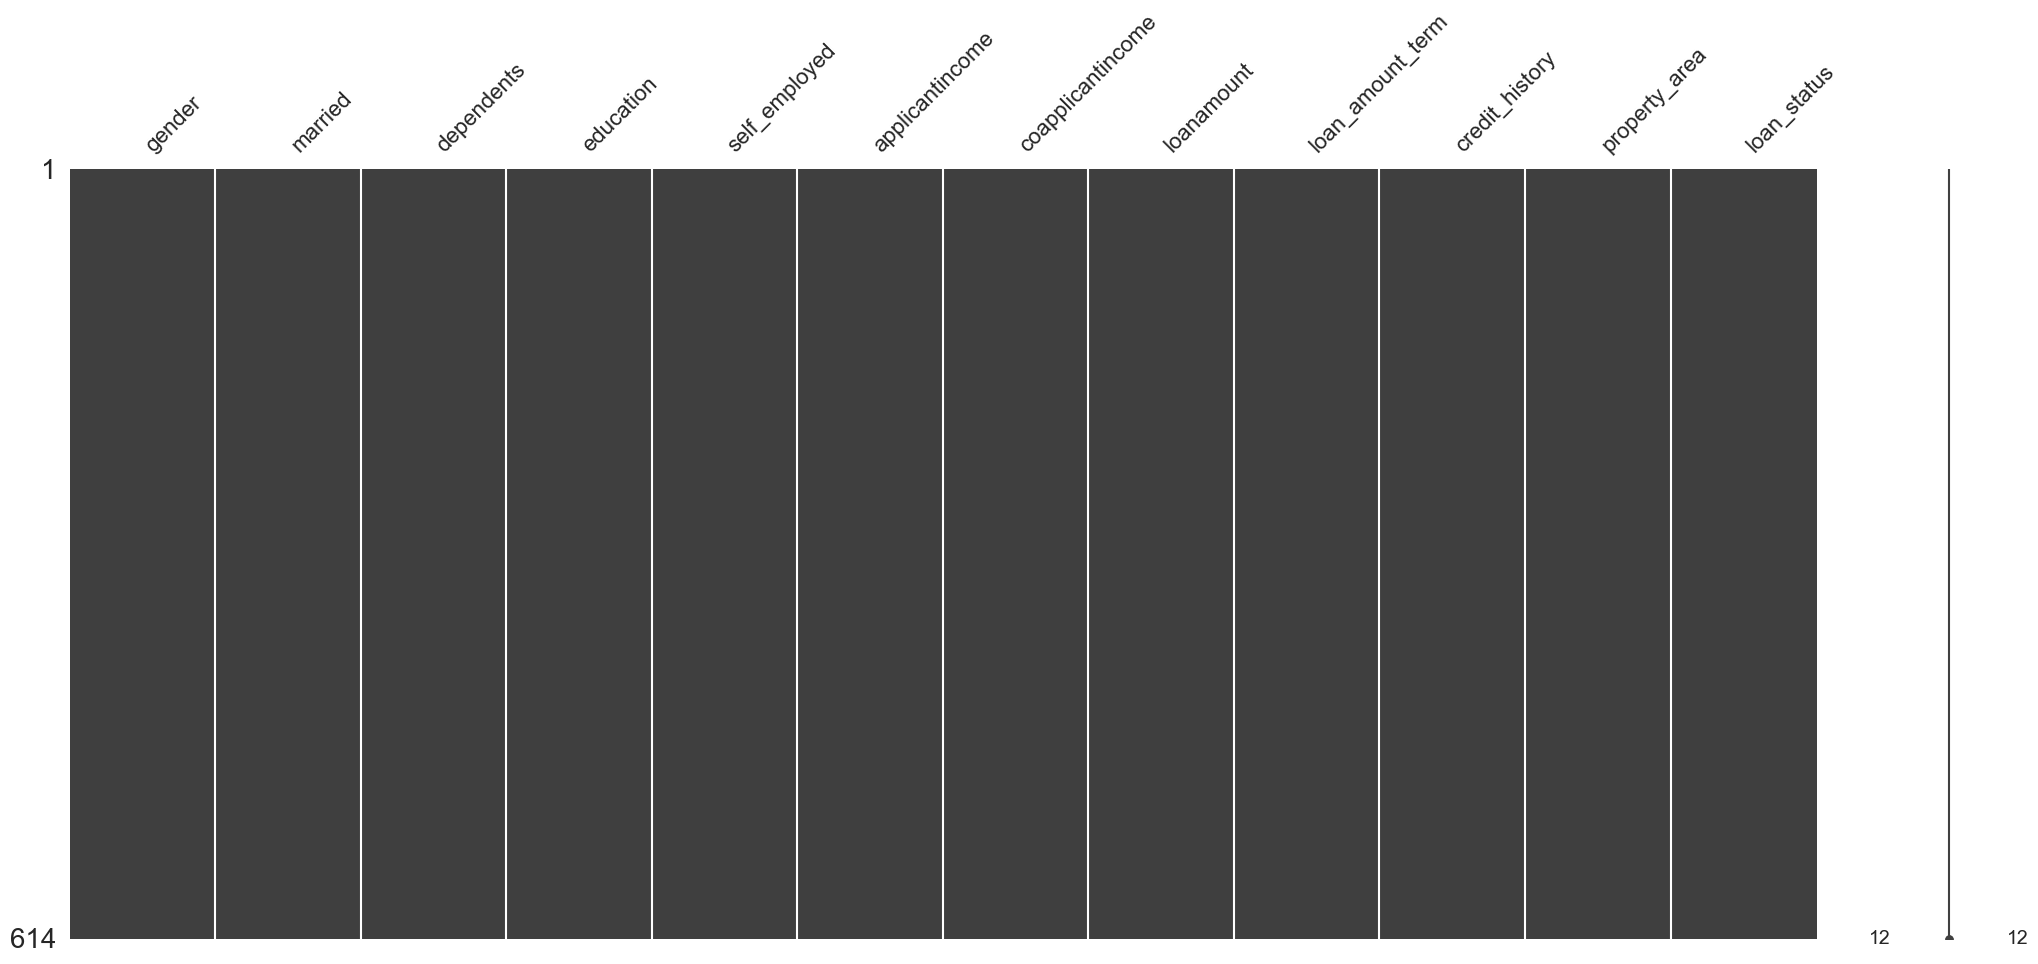

In [107]:
msno.matrix(df_loan)

### 5. Data Cleaning


In [108]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [109]:
numerical_cols = list(df_loan.select_dtypes(include=['int64', 'float64']).columns)
# numerical_cols.remove('')
numerical_cols

['applicantincome',
 'coapplicantincome',
 'loanamount',
 'loan_amount_term',
 'credit_history']

In [110]:
categorical_cols = list(df_loan.select_dtypes(include=['object']).columns)
categorical_cols

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [111]:
# To convert the column "dependents" into int

# So, firstly remove the "+"
 
df_loan.dependents= df_loan["dependents"].str.replace("+", "")

In [112]:
df_loan["dependents"] = pd.to_numeric(df_loan["dependents"])

In [113]:
df_loan['dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [114]:
df_loan['dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: dependents, dtype: int64

In [115]:
df_loan['dependents'].isnull().sum()

15

In [116]:
# In this case we replace null values by zero 
from cmath import nan

# 
df_loan["dependents"]= df_loan["dependents"].replace(nan, 4)

In [117]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    float64
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


### 6. Transform Data Type

**transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.**<br>


In [118]:
df_loan.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [119]:
df_loan = pd.get_dummies(df_loan)

# Drop columns
df_loan = df_loan.drop(['gender_Female', 'married_No', 'education_Not Graduate', 
              'self_employed_No', 'loan_status_N'], axis = 1)

# Rename columns name
new = {'gender_Male': 'gender', 'married_Yes': 'married', 
       'education_Graduate': 'education', 'self_employed_Yes': 'self_employed',
       'loan_status_Y': 'loan_status'}
       
df_loan.rename(columns=new, inplace=True)

In [120]:
# df_loan = pd.get_dummies(df_loan  , drop_first=True)


In [121]:
# # Rename columns name
# new_columns_name = {'gender_Male': 'gender', 'married_Yes': 'married', 
#        'education_Not Graduate': 'education', 'self_employed_Yes': 'self_Employed',
#        'loan_status_Y': 'loan_Status'}
       
# df_loan.rename(columns=new_columns_name, inplace=True)

### 7. Detect  and Handle outliers


**Outliers not always a bad thing, handle outlier if you believe It's wrong or anomal data, if the outlier represents a usefull information of the variance of data so dont handle it.**
<br>
1. Detect Outliers with Visualization.
2. Detect and Handle Outliers with Statistical methods.
    - Outlier Handling via Removing
    - Outlier Handling via Replacing with Median

<AxesSubplot: xlabel='loanamount'>

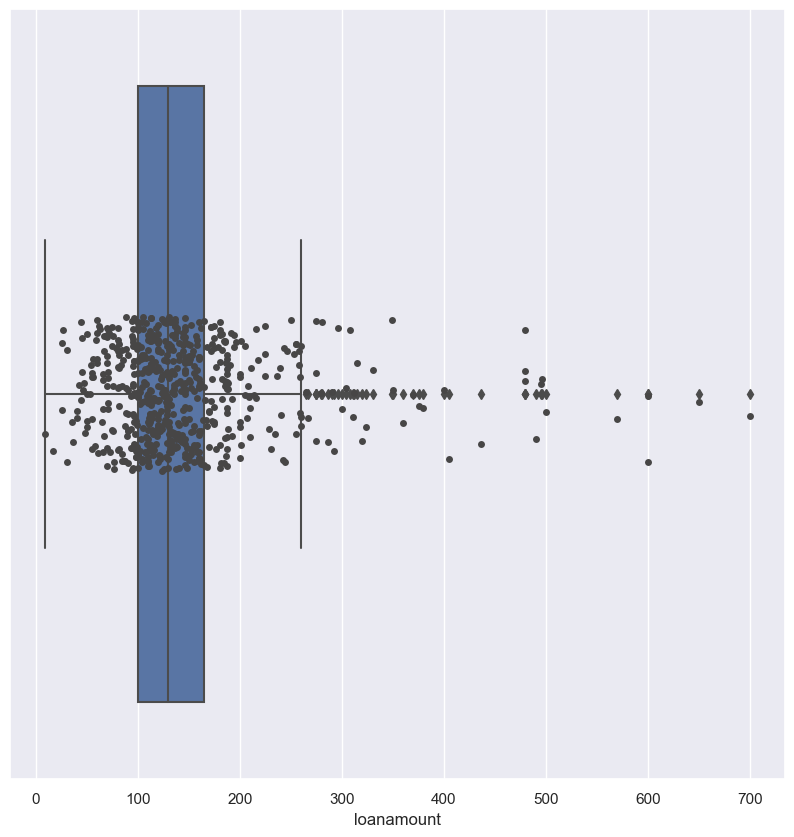

In [122]:
sns.boxplot(x='loanamount', data=df_loan)
sns.stripplot(x='loanamount', data=df_loan, color="#474646")

In [123]:
px.box(df_loan, x='loanamount', title='Distribution of loanamount', width=500, height=500)

<AxesSubplot: xlabel='applicantincome'>

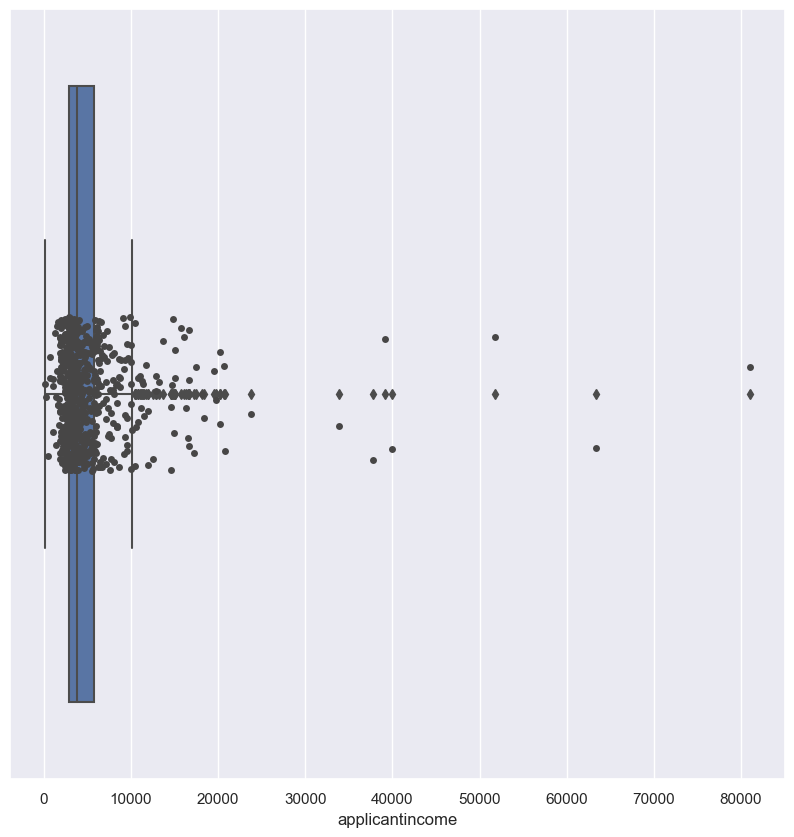

In [124]:
sns.boxplot(x='applicantincome', data=df_loan)
sns.stripplot(x='applicantincome', data=df_loan, color="#474646")

<AxesSubplot: xlabel='coapplicantincome'>

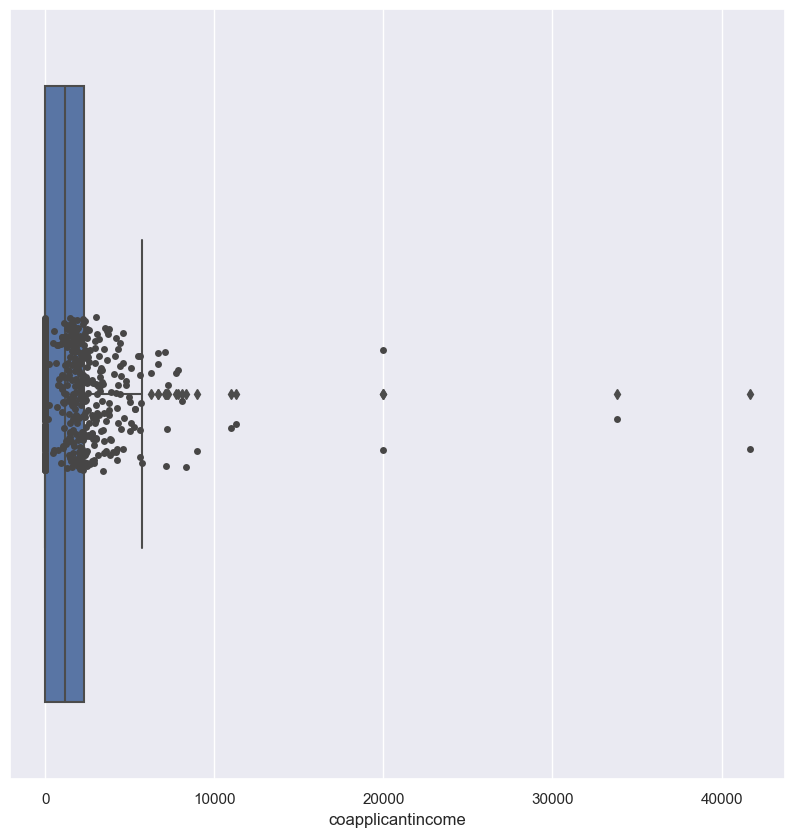

In [125]:
sns.boxplot(x='coapplicantincome', data=df_loan)
sns.stripplot(x='coapplicantincome', data=df_loan, color="#474646")

**IQR (Interquartile Range)**:<br>
- It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1).<br>
- Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.
<br>
<img src='https://miro.medium.com/max/2594/0*metZYDkpEy6nSlfc.png'>
<br>

**Steps**
- For each column, first it computes the IQR = Q3 - Q1.
- Then is discard values where less than (Q1 - IQR * 1.5) or more than (Q3 + IQR * 1.5) 
- Finally, result of this condition is used to index the dataframe.

1) **Outlier Handling via Removing**

In [126]:
from datasist.structdata import detect_outliers

In [127]:
outliers_indices = detect_outliers(df_loan, 0, df_loan.columns)
len(outliers_indices)

394

In [128]:
df_loan.drop(outliers_indices, inplace=True)
df_loan

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender,married,education,self_employed,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,0.0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,1,0,0,0
4,0.0,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,1
8,2.0,4006,1526.0,168.000000,360.0,1.0,1,1,1,0,0,0,1,1
10,2.0,3200,700.0,70.000000,360.0,1.0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.0,3676,4301.0,172.000000,360.0,1.0,1,0,1,0,1,0,0,1
606,1.0,3400,2500.0,173.000000,360.0,1.0,1,1,1,0,0,1,0,1
608,0.0,3232,1950.0,108.000000,360.0,1.0,1,1,1,0,1,0,0,1
611,1.0,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,1,1


2) **Outlier Handling via Replacing with Median**

In [129]:
# from datasist.structdata import detect_outliers

In [130]:
# for col in df_loan.columns:
#     outliers_indices = detect_outliers(df_loan, 0, [col])
#     col_median = df_loan[col].median()
#     df_loan[col].iloc[outliers_indices] = col_median

<AxesSubplot: xlabel='loanamount'>

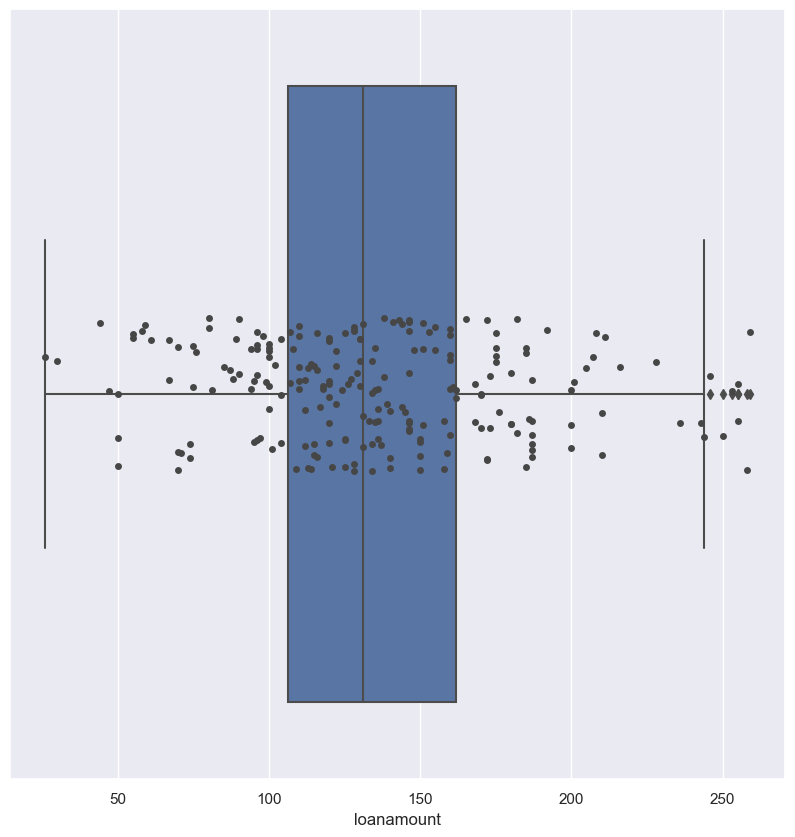

In [131]:
sns.boxplot(x='loanamount', data=df_loan)
sns.stripplot(x='loanamount', data=df_loan, color="#474646")

<AxesSubplot: xlabel='applicantincome'>

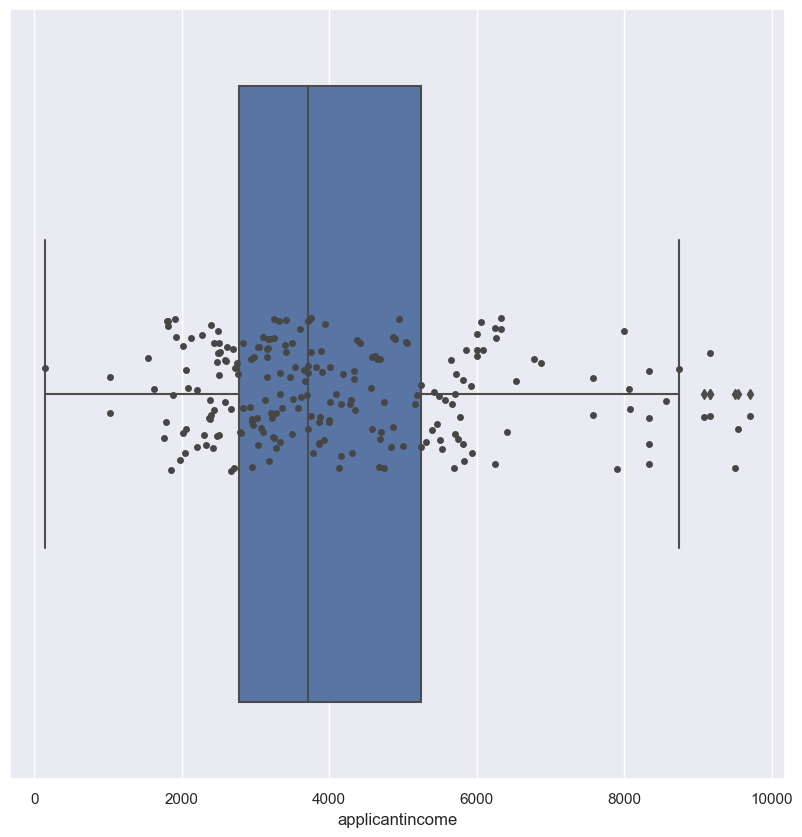

In [132]:
sns.boxplot(x='applicantincome', data=df_loan)
sns.stripplot(x='applicantincome', data=df_loan, color="#474646")

<AxesSubplot: xlabel='coapplicantincome'>

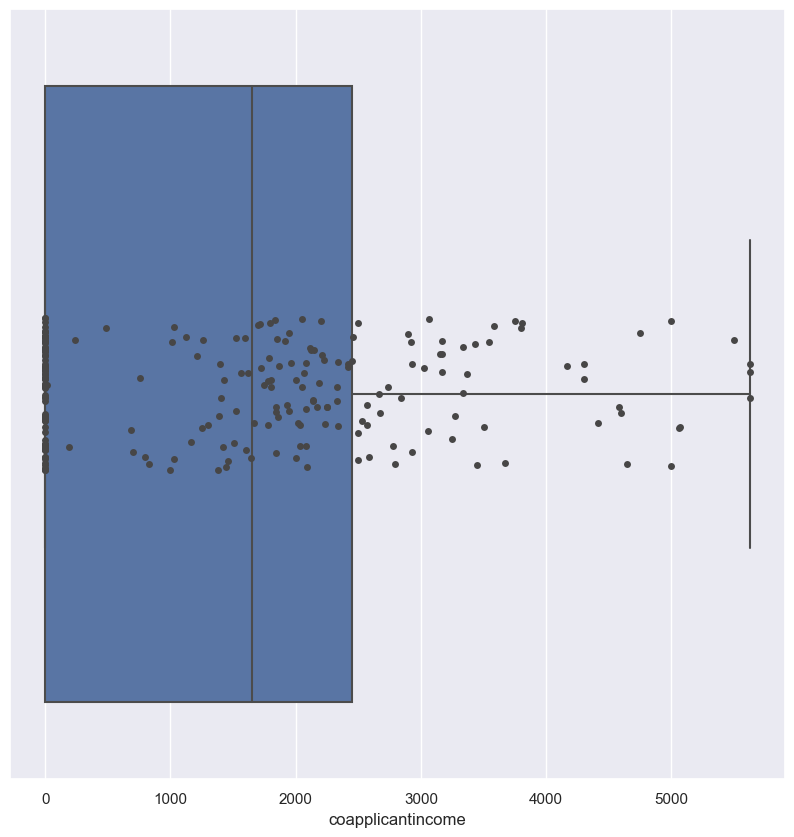

In [133]:
sns.boxplot(x='coapplicantincome', data=df_loan)
sns.stripplot(x='coapplicantincome', data=df_loan, color="#474646")

In [134]:
df_loan.shape

(220, 14)

### 8. Handle Skewed Distribution

**What is Skewed Data?**
* A data is called as skewed when curve appears distorted either to the left or to the right, in a statistical distribution.I.e one tail is longer than the other.<br>
<br>
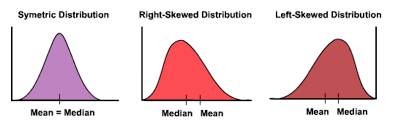
<br>
So as we can see Fare distribution is very skewed. Such data can be handled by following ways:
* Log Transform
* Box Cox Transform
* Square Root Transform


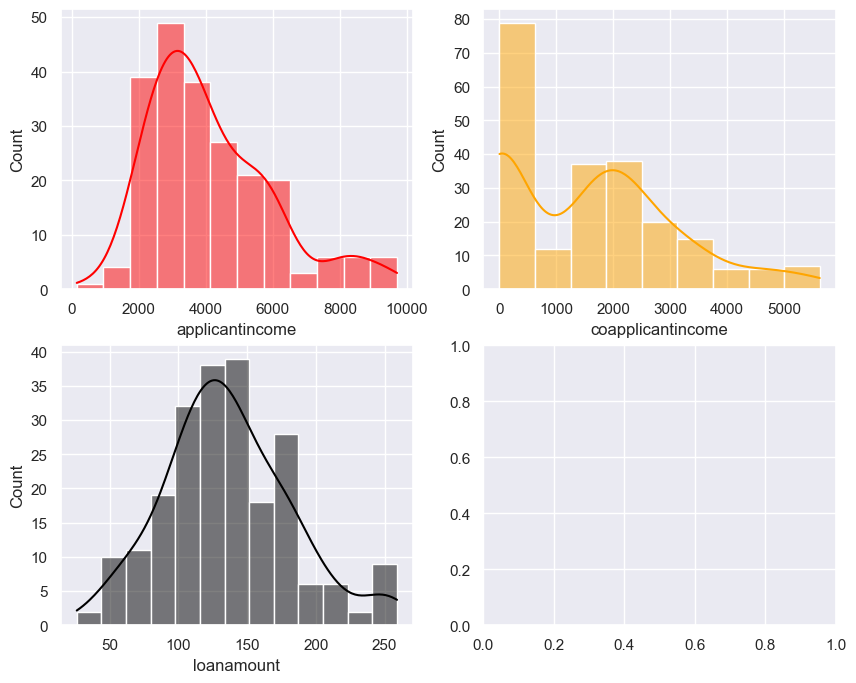

In [135]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_loan, x="applicantincome", kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df_loan, x="coapplicantincome", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df_loan, x="loanamount", kde=True, ax=axs[1, 0], color='black');

In [136]:
# Square Root Transformation

df_loan.applicantincome = np.sqrt(df_loan.applicantincome)
df_loan.coapplicantincome = np.sqrt(df_loan.coapplicantincome)
df_loan.loanamount = np.sqrt(df_loan.loanamount)

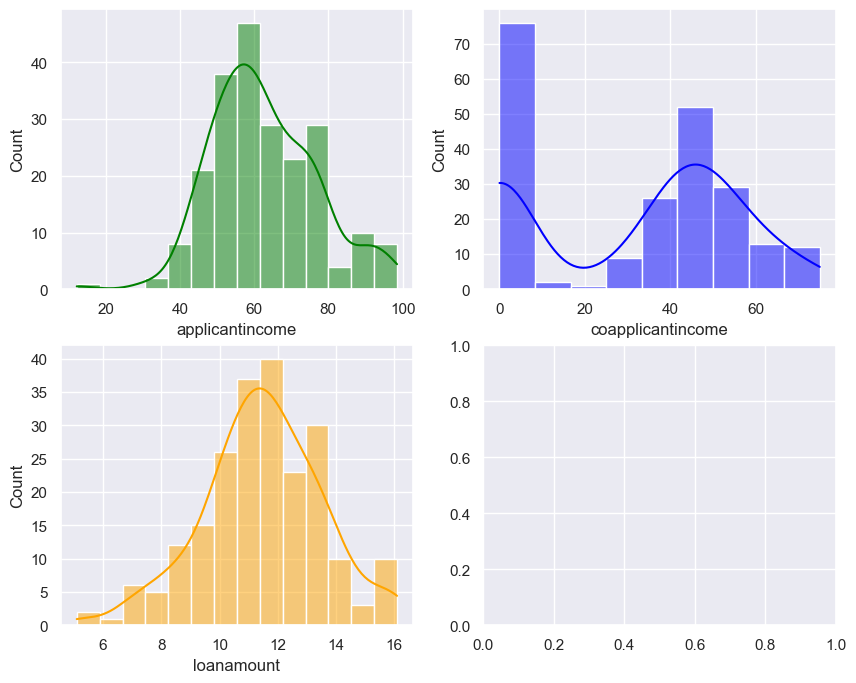

In [137]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df_loan, x="applicantincome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df_loan, x="coapplicantincome", kde=True, ax=axs[0, 1], color='blue')
sns.histplot(data=df_loan, x="loanamount", kde=True, ax=axs[1, 0], color='orange');

In [138]:
# To check for skew in data
df_loan.skew().sort_values(ascending=False)

dependents                 1.177898
property_area_Rural        1.053751
property_area_Urban        0.633297
property_area_Semiurban    0.489859
applicantincome            0.321238
loan_amount_term           0.000000
credit_history             0.000000
gender                     0.000000
education                  0.000000
self_employed              0.000000
loanamount                -0.193706
coapplicantincome         -0.206556
married                   -1.080286
loan_status               -1.786501
dtype: float64

### 9. Deal with Imbalanced Classes


<img src='https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png'>
<br>

We can handle unbalanced ratio of observations in each class by :<br>

* Down-sampling or Under-sampling Majority Class<br>
* Generate Synthetic Samples with SMOTE

In [139]:
df_loan.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'gender', 'married', 'education',
       'self_employed', 'property_area_Rural', 'property_area_Semiurban',
       'property_area_Urban', 'loan_status'],
      dtype='object')

In [140]:
from imblearn.over_sampling import SMOTE

# Features Separating
#Dependent features (Loan_Status) will be seperated from independent features.

X = df_loan.drop(["loan_status"], axis=1)
y = df_loan["loan_status"]


X , y = SMOTE().fit_resample(X,y)

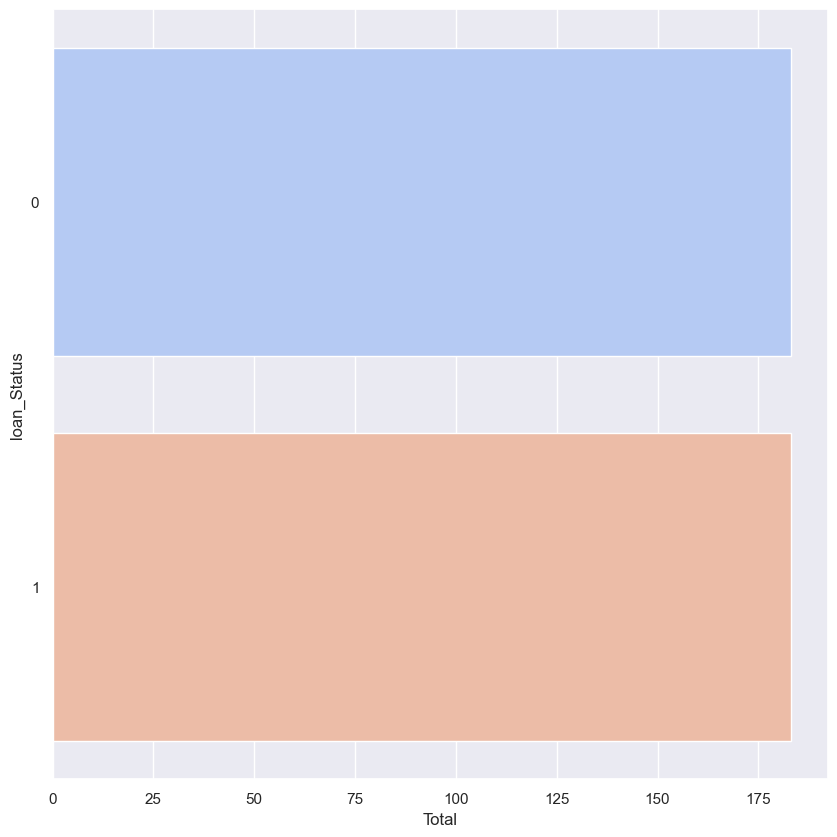

In [141]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('loan_Status')
plt.xlabel('Total')
plt.show()

### 10. Data Normalization

to normalize the range of independent variables or features of data

In [142]:
X = MinMaxScaler().fit_transform(X)

### 11. Splitting Data Set

In [143]:
# Data Splitting into features and target
# Splitting Data into 80% train and 20% test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
X_train.shape


(292, 13)

In [145]:
X_test.shape

(74, 13)

In [146]:
y_train.shape

(292,)

In [147]:
# Training the model
model = svm.SVC(kernel='linear')
classifier = model.fit(X_train,y_train)

In [148]:
# Model Evaluation
#accuracy score with training data
X_pred =model.predict(X_train)
accuracy = accuracy_score(X_pred,y_train)
print('accuracy on training data',accuracy)

accuracy on training data 0.7294520547945206


In [149]:
# accuracy score with test data
Y_pred = model.predict(X_test)


In [150]:
accuracyy = accuracy_score(Y_pred,y_test)

In [151]:
print('accuracy on test data',accuracyy)


accuracy on test data 0.6756756756756757


# **Modeling**

### 1. Logistic Regression

In [152]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.81      0.78      0.79        37

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74

[[30  7]
 [ 8 29]]
LR accuracy: 79.73%


### 2. K-Nearest Neighbour (KNN)

In [153]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    

KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

KNN best accuracy: 87.84%


### 3. Support Vector Machine (SVM)

In [154]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        37
           1       0.72      0.84      0.77        37

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74

[[25 12]
 [ 6 31]]
SVC accuracy: 75.68%


### 4. Decision Tree

In [155]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    

DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Decision Tree Accuracy: 82.43%


### 5. Random Forest

In [156]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    

RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  86.49%


## **Model Comparison**

In [157]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Decision Tree','Random Forest'],
                                 'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                               DTAcc*100, RFAcc*100 ]})
                                     
compare.sort_values(by='Accuracy', ascending=False)   
                                   
                        

,Model,Accuracy
1,K Neighbors,87.837838
4,Random Forest,86.486486
3,Decision Tree,82.432432
0,Logistic Regression,79.729730
2,SVM,75.675676


In [158]:
# import pickle as pk
# pk.dump(, open('transf.pkl', 'wb'))

## **Model Saving**

In [159]:
import pickle as pk
# pk.dump(KNAcc, open('RF.pkl', 'wb'))

# t = pickle.load(open('transf.pkl', 'rb'))
# m = pickle.load(open('RF.pkl', 'rb'))